In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [4]:
raw_data = pd.read_csv('okexFutureEth.csv')

In [5]:
raw_data = raw_data.sort_values(by='date')

In [6]:
raw_data['return'] = raw_data['close'].pct_change()

In [7]:
raw_data

,Unnamed: 0,symbol,date,open,high,low,close,vol,return
1176,1176,btcusdt,2019-01-02 00:00:00,3571.20,3582.02,3566.98,3579.78,3120.419322,NaN
1175,1175,btcusdt,2019-01-02 01:00:00,3579.78,3584.86,3563.00,3576.85,2652.741773,-0.000818
1174,1174,btcusdt,2019-01-02 02:00:00,3576.85,3576.85,3505.99,3544.98,7113.779833,-0.008910
1173,1173,btcusdt,2019-01-02 03:00:00,3545.00,3602.11,3543.57,3593.58,4036.237310,0.013710
1172,1172,btcusdt,2019-01-02 04:00:00,3593.48,3628.47,3588.02,3618.18,6480.874092,0.006846
1171,1171,btcusdt,2019-01-02 05:00:00,3618.26,3629.00,3605.60,3609.45,2566.709206,-0.002413
1170,1170,btcusdt,2019-01-02 06:00:00,3608.48,3614.03,3592.87,3607.13,2462.292486,-0.000643
1169,1169,btcusdt,2019-01-02 07:00:00,3607.18,3704.37,3605.00,3702.09,13631.377035,0.026326
1168,1168,btcusdt,2019-01-02 08:00:00,3699.62,3715.14,3662.71,3679.10,7353.418548,-0.006210
1167,1167,btcusdt,2019-01-02 09:00:00,3679.30,3692.96,3667.00,3672.31,4281.289632,-0.001846


In [8]:
clean_return = raw_data['return'].dropna()

In [9]:
clean_return

1175   -0.000818
1174   -0.008910
1173    0.013710
1172    0.006846
1171   -0.002413
1170   -0.000643
1169    0.026326
1168   -0.006210
1167   -0.001846
1166    0.001683
1165   -0.001492
1164    0.001277
1163   -0.001039
1162   -0.005074
1161    0.004013
1160    0.001766
1159   -0.001654
1158    0.002915
1157   -0.000644
1156    0.001870
1155    0.008544
1154   -0.004574
1153   -0.002200
1152    0.005688
1151    0.001201
1150   -0.000624
1149    0.000105
1148    0.006112
1147    0.003183
1146    0.001917
          ...   
29      0.005501
28      0.007057
27      0.013780
26      0.003864
25      0.002816
24      0.022054
23     -0.002110
22      0.004816
21     -0.002988
20      0.001344
19     -0.003354
18      0.002608
17      0.001983
16      0.015025
15     -0.014816
14     -0.003049
13      0.001401
12      0.004114
11     -0.003164
10      0.002680
9       0.003196
8      -0.001313
7      -0.005256
6       0.001941
5       0.001061
4       0.003797
3       0.014406
2      -0.0065

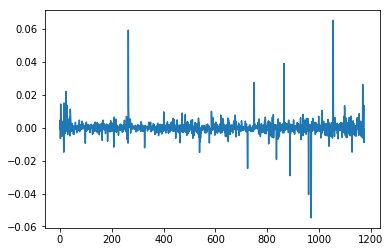

In [10]:
clean_return.plot()
plt.show()

In [11]:
mean_return = np.mean(clean_return)
print (mean_return)

0.00010141458413801259


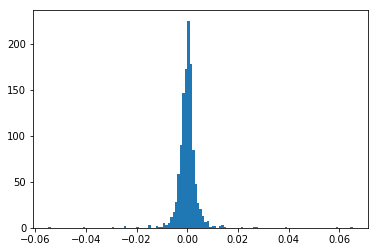

In [12]:
plt.hist(clean_return, bins=125)
plt.show()

In [13]:
# 计算标准差
sigma_daily = np.std(clean_return)
print("标准差: ", sigma_daily)

# 计算方差
variance_daily = pow(sigma_daily,2)
print("方差: ", variance_daily)

标准差:  0.004945050170085243
方差:  2.445352118466009e-05


In [14]:
returns_skewness = skew(clean_return)
print("偏度：", returns_skewness)

偏度： 2.1090805046550223
